In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "veneto"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.25
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,64.29
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.97
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.70
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021-01-31T17:00:00,5,Veneto,1430,217,1647,32298,33945,-732,499,...,9.0,21044.0,2313.0,-719.0,13.18,4.85,2.37,21.57,-2.25,-2.11
342,2021-02-01T17:00:00,5,Veneto,1410,214,1624,32196,33820,-125,510,...,39.0,11562.0,1519.0,-102.0,13.18,4.80,4.41,33.57,-1.38,-0.37
343,2021-02-02T17:00:00,5,Veneto,1423,193,1616,30428,32044,-1776,621,...,76.0,39304.0,2374.0,-1768.0,11.94,5.04,1.58,26.16,-9.81,-5.25
344,2021-02-03T17:00:00,5,Veneto,1306,176,1482,28878,30360,-1684,629,...,57.0,39047.0,2890.0,-1550.0,11.88,4.88,1.61,21.76,-8.81,-5.26


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 896
Nuovi tamponi: 36294.0
Percentuale nuovi positivi/nuovi tamponi: 2.5 %
Nuovi guariti: 2490.0
Nuovi deceduti: 62.0
Variazione positivi ricoverati con sintomi: -74.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: -1582.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-06T17:00:00,5,Veneto,2508,308,2816,73988,76804,1846,3444,...,37.0,14418.0,4471.0,1831.0,10.94,3.67,23.89,77.03,-1.28,2.46
1,2020-12-07T17:00:00,5,Veneto,2529,317,2846,75455,78301,1497,2550,...,51.0,9263.0,3342.0,1467.0,11.14,3.63,27.53,76.30,2.92,1.95
2,2020-12-08T17:00:00,5,Veneto,2529,319,2848,76900,79748,1447,3145,...,113.0,15589.0,4358.0,1445.0,11.20,3.57,20.17,72.17,0.63,1.85
3,2020-12-09T17:00:00,5,Veneto,2551,319,2870,78148,81018,1270,2427,...,29.0,10798.0,3255.0,1248.0,11.11,3.54,22.48,74.56,0.00,1.59
4,2020-12-10T17:00:00,5,Veneto,2606,330,2936,80201,83137,2119,4197,...,148.0,20117.0,6153.0,2053.0,11.24,3.53,20.86,68.21,3.45,2.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-31T17:00:00,5,Veneto,1430,217,1647,32298,33945,-732,499,...,9.0,21044.0,2313.0,-719.0,13.18,4.85,2.37,21.57,-2.25,-2.11
57,2021-02-01T17:00:00,5,Veneto,1410,214,1624,32196,33820,-125,510,...,39.0,11562.0,1519.0,-102.0,13.18,4.80,4.41,33.57,-1.38,-0.37
58,2021-02-02T17:00:00,5,Veneto,1423,193,1616,30428,32044,-1776,621,...,76.0,39304.0,2374.0,-1768.0,11.94,5.04,1.58,26.16,-9.81,-5.25
59,2021-02-03T17:00:00,5,Veneto,1306,176,1482,28878,30360,-1684,629,...,57.0,39047.0,2890.0,-1550.0,11.88,4.88,1.61,21.76,-8.81,-5.26


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

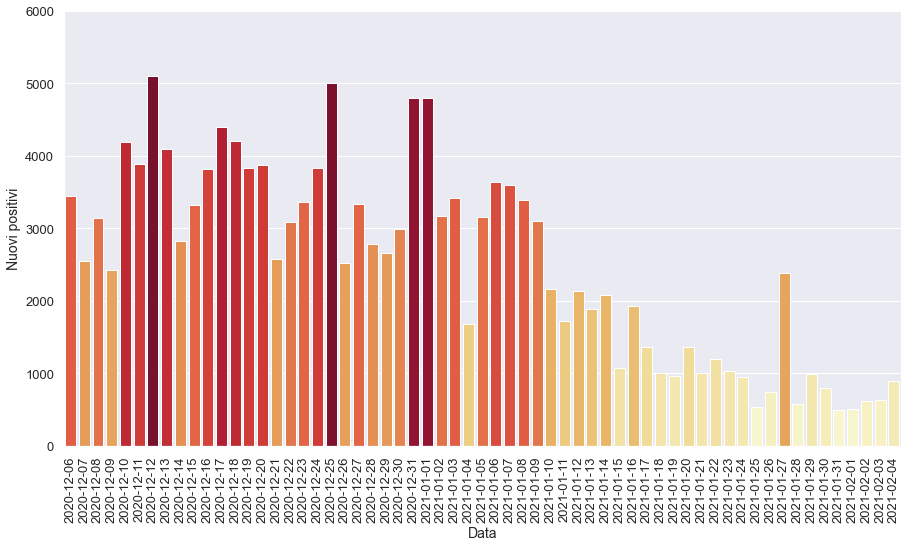

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

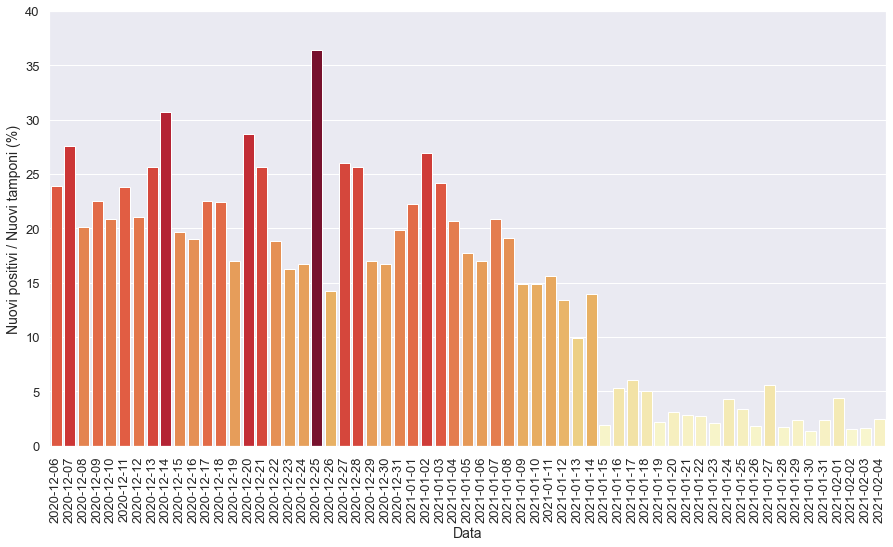

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

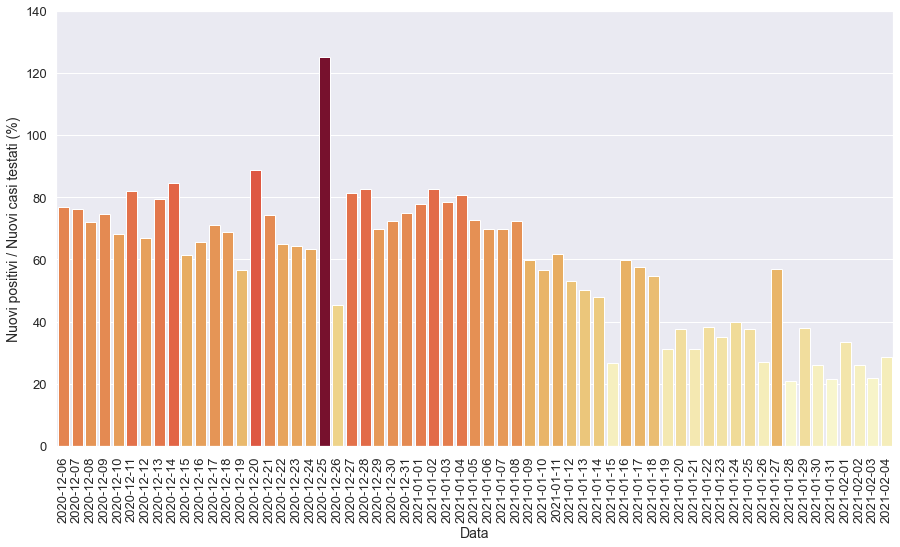

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

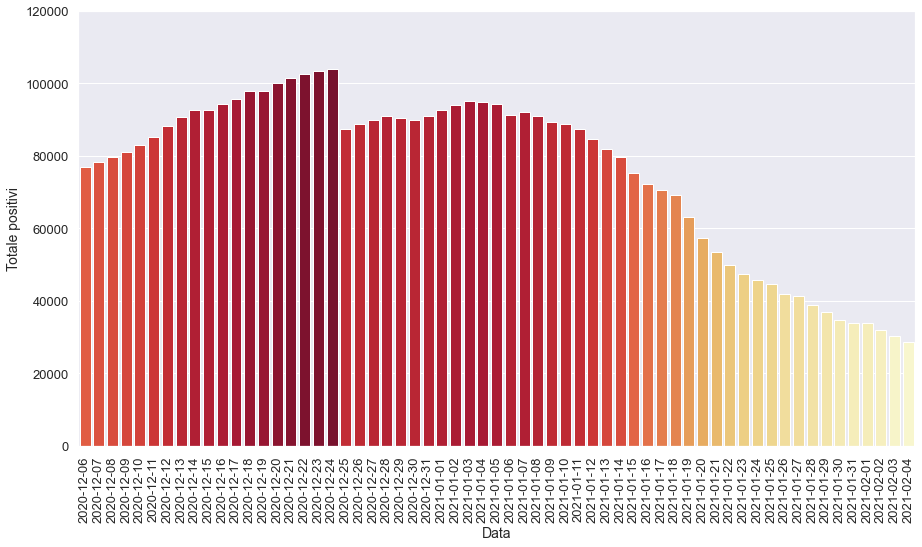

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

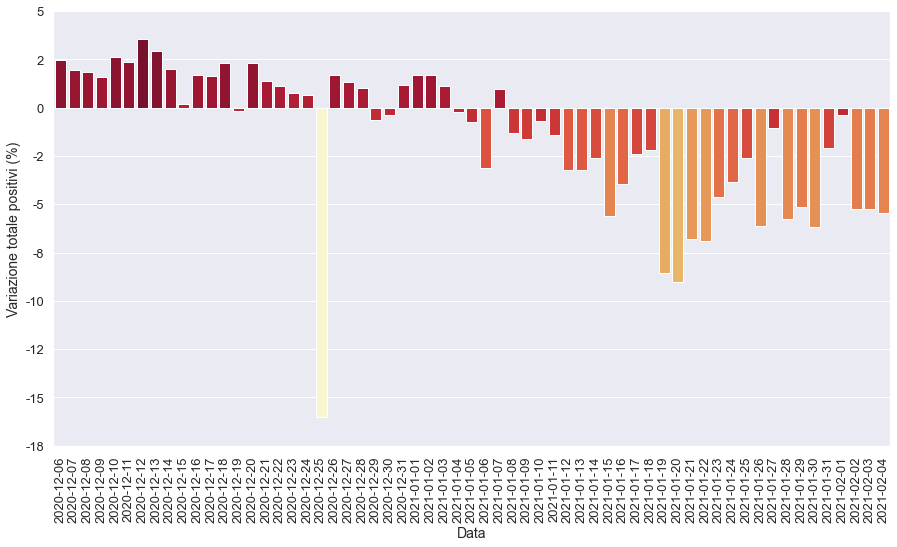

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

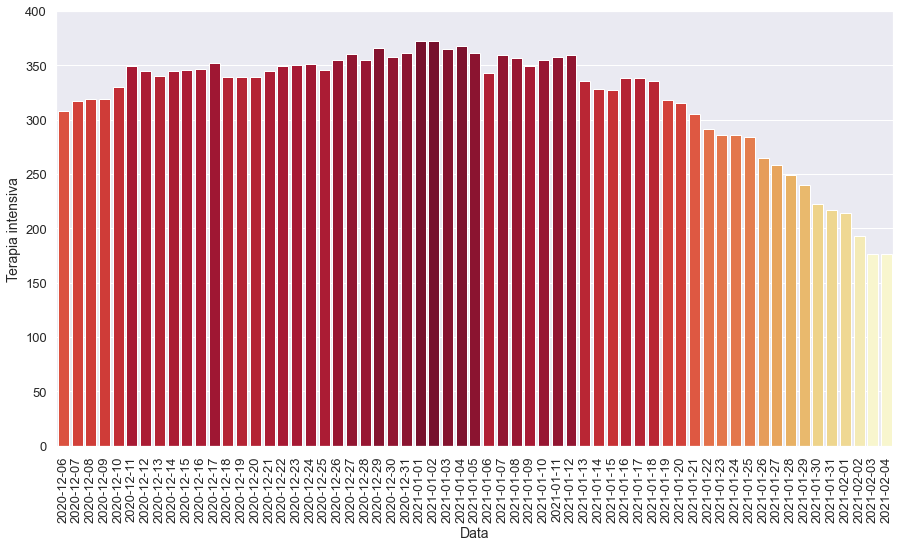

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

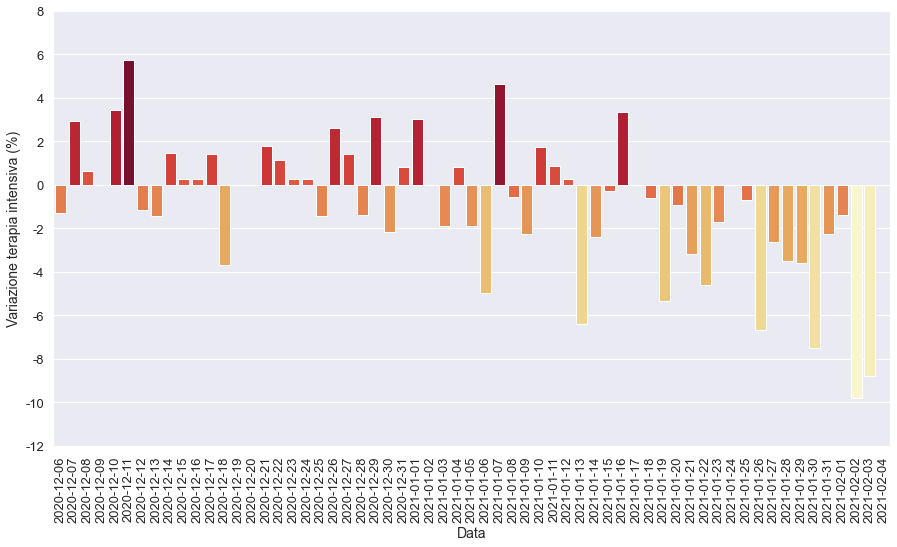

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

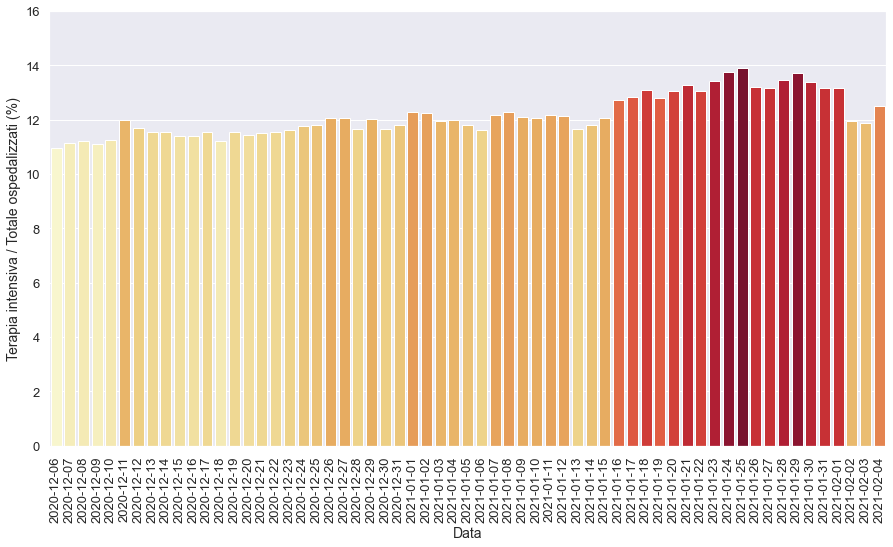

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

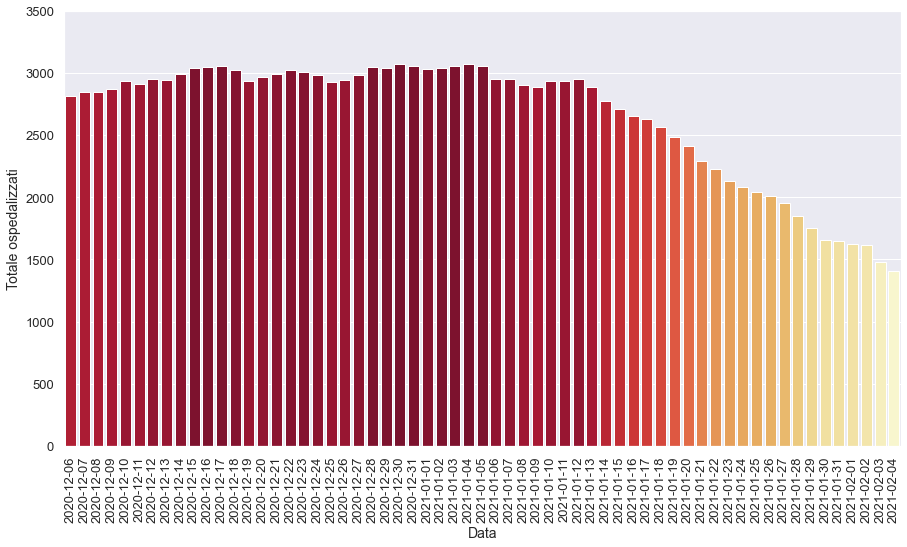

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

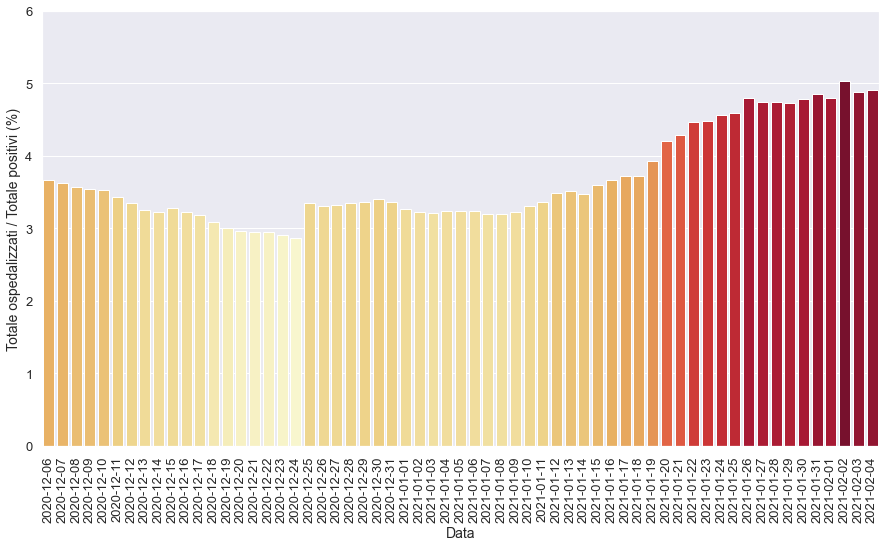

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

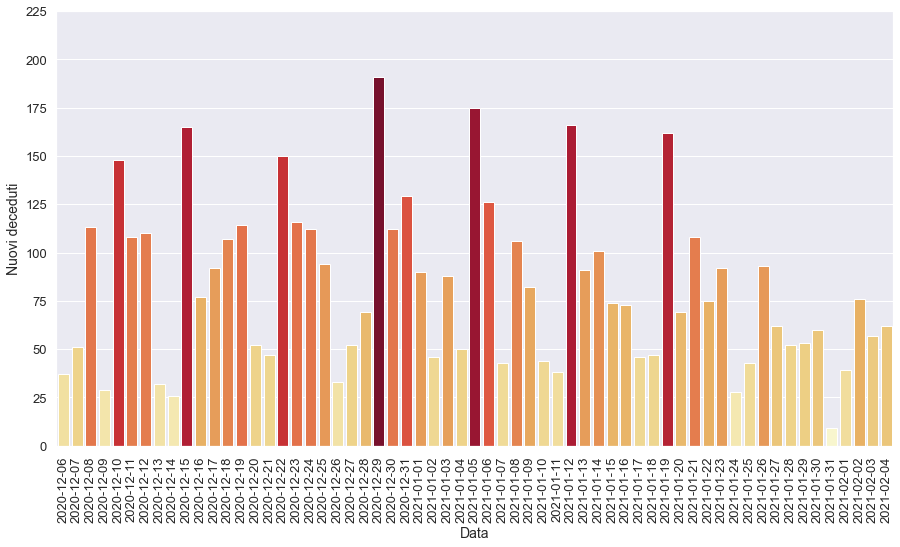

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

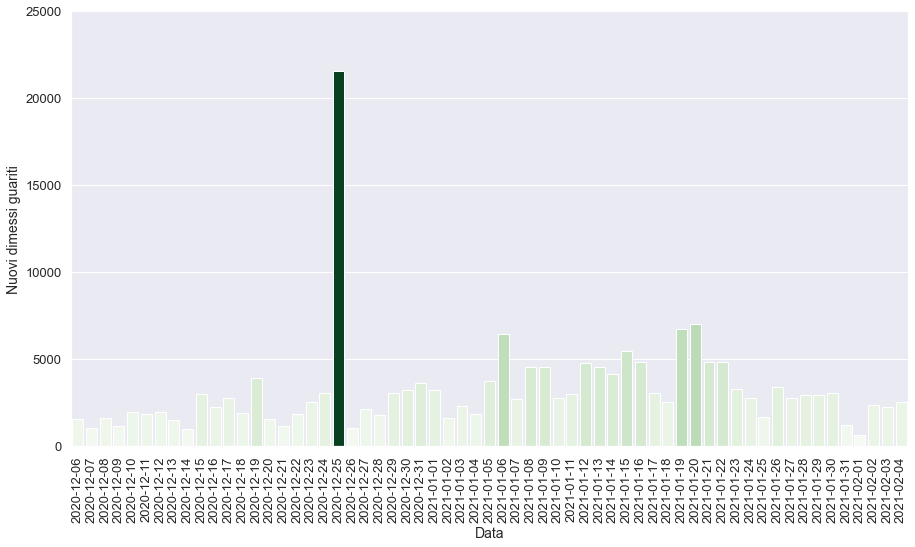

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-05T17:00:00,5,Veneto,2694,361,3055,91173,94228,-728,3151,...,175.0,17734.0,4339.0,-709.0,11.82,3.24,17.77,72.62,-1.90,-0.77
1,2021-01-06T17:00:00,5,Veneto,2612,343,2955,88344,91299,-2929,3638,...,126.0,21386.0,5223.0,-2829.0,11.61,3.24,17.01,69.65,-4.99,-3.11
2,2021-01-07T17:00:00,5,Veneto,2594,359,2953,89223,92176,877,3596,...,43.0,17243.0,5163.0,879.0,12.16,3.20,20.85,69.65,4.66,0.96
3,2021-01-08T17:00:00,5,Veneto,2549,357,2906,88044,90950,-1226,3388,...,106.0,17722.0,4683.0,-1179.0,12.28,3.20,19.12,72.35,-0.56,-1.33
4,2021-01-09T17:00:00,5,Veneto,2540,349,2889,86562,89451,-1499,3100,...,82.0,20779.0,5188.0,-1482.0,12.08,3.23,14.92,59.75,-2.24,-1.65
5,2021-01-10T17:00:00,5,Veneto,2585,355,2940,85873,88813,-638,2167,...,44.0,14586.0,3820.0,-689.0,12.07,3.31,14.86,56.73,1.72,-0.71
6,2021-01-11T17:00:00,5,Veneto,2582,358,2940,84600,87540,-1273,1715,...,38.0,11001.0,2784.0,-1273.0,12.18,3.36,15.59,61.60,0.85,-1.43
7,2021-01-12T17:00:00,5,Veneto,2596,359,2955,81770,84725,-2815,2134,...,166.0,15867.0,4032.0,-2830.0,12.15,3.49,13.45,52.93,0.28,-3.22
8,2021-01-13T17:00:00,5,Veneto,2551,336,2887,79083,81970,-2755,1884,...,91.0,19063.0,3747.0,-2687.0,11.64,3.52,9.88,50.28,-6.41,-3.25
9,2021-01-14T17:00:00,5,Veneto,2447,328,2775,77050,79825,-2145,2076,...,101.0,14904.0,4329.0,-2033.0,11.82,3.48,13.93,47.96,-2.38,-2.62


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

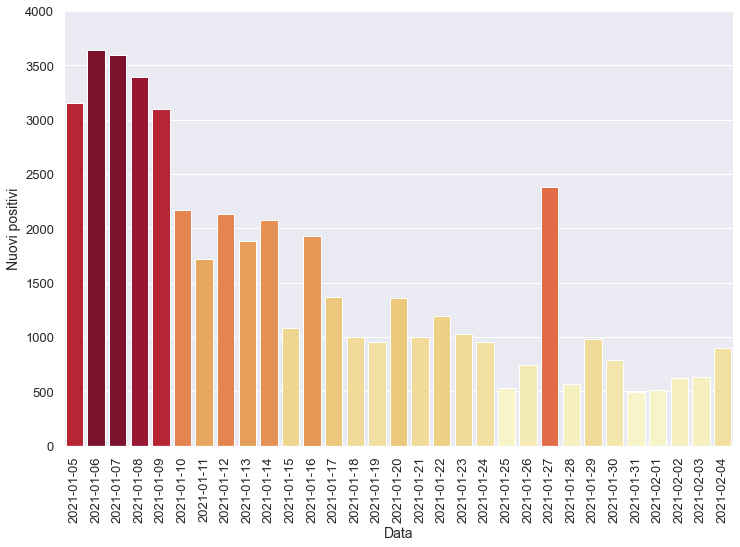

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

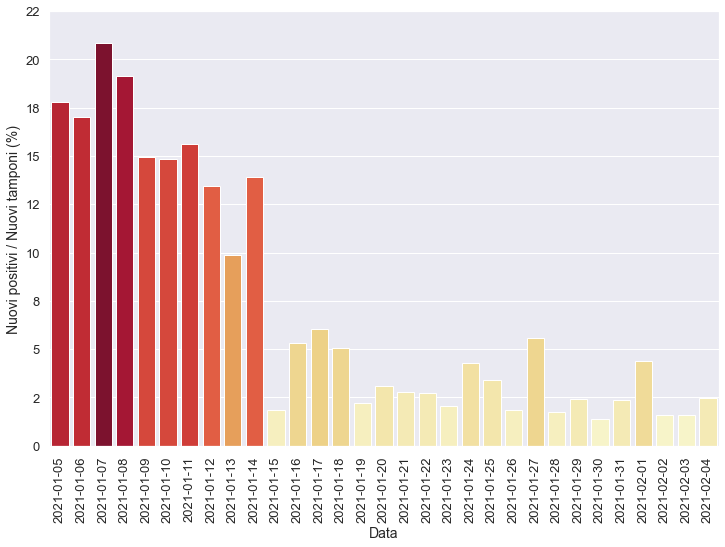

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

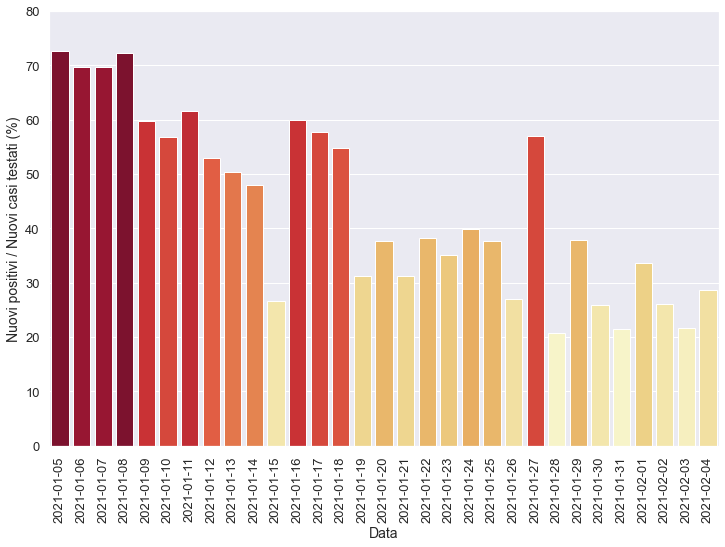

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

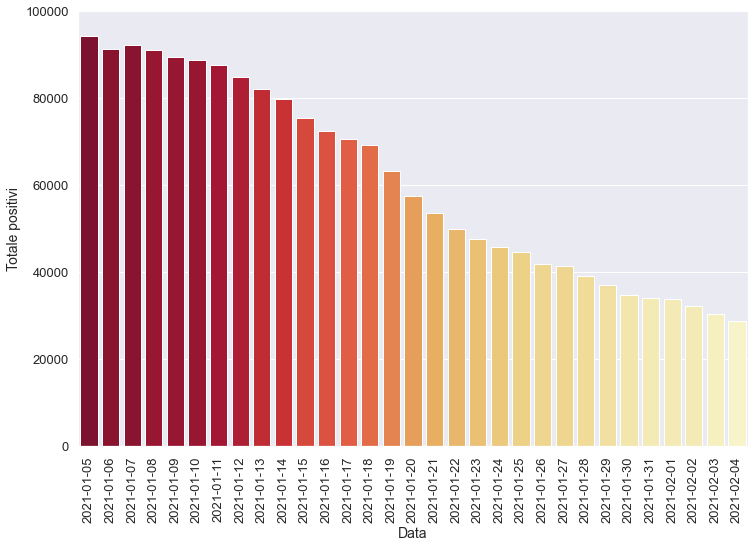

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

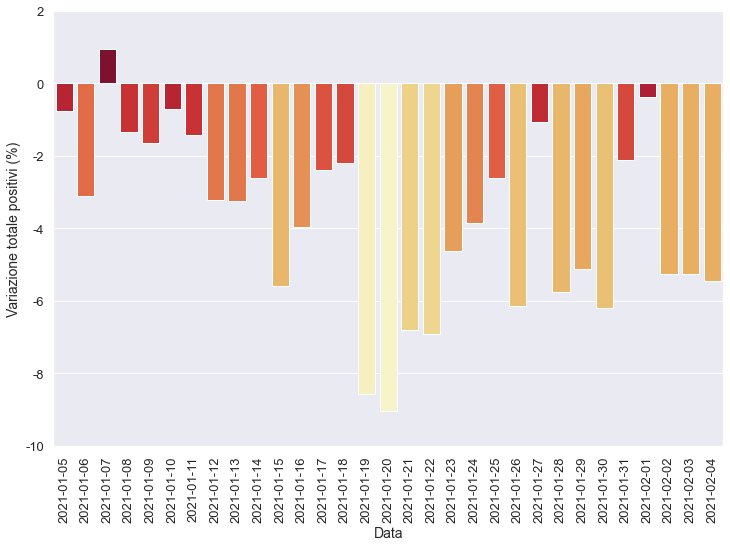

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

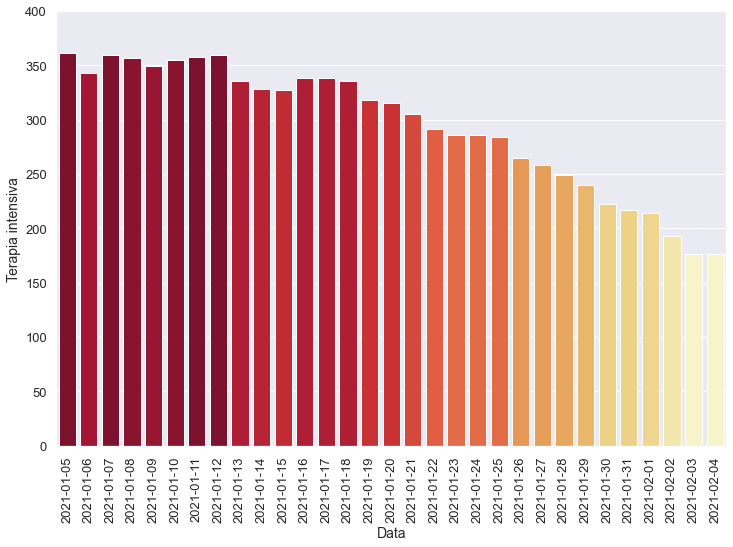

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

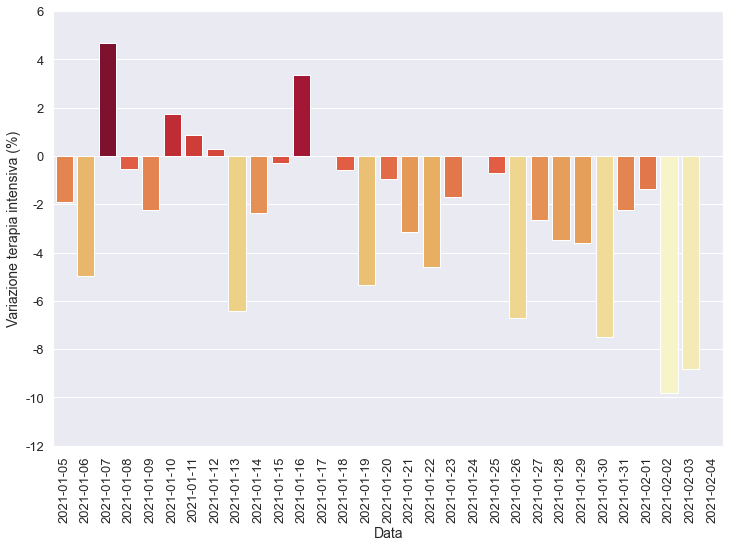

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

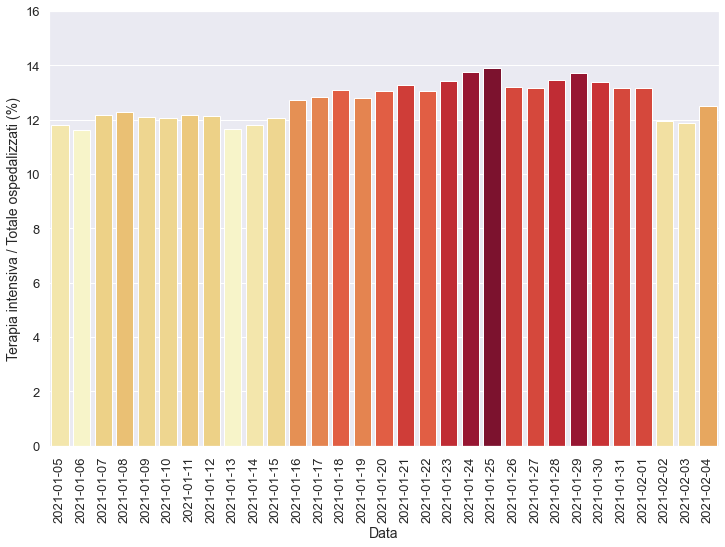

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

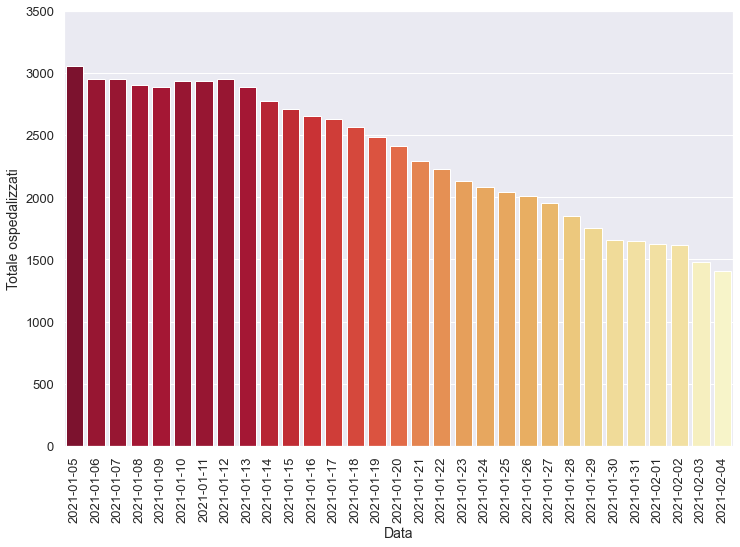

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

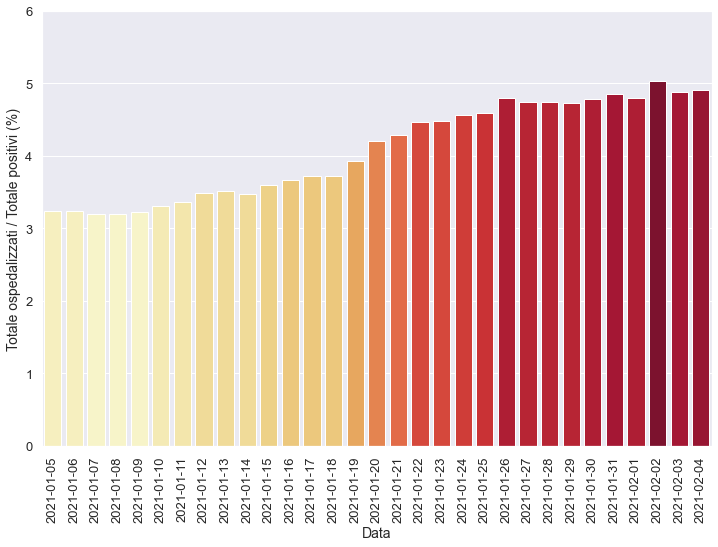

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

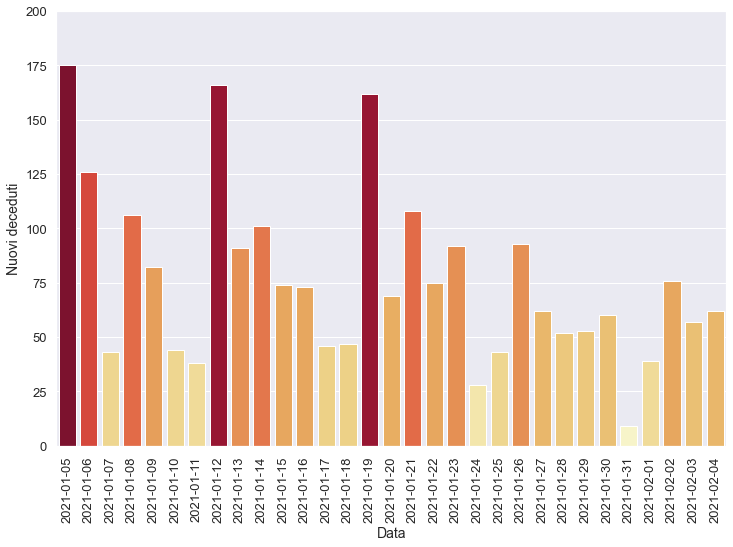

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

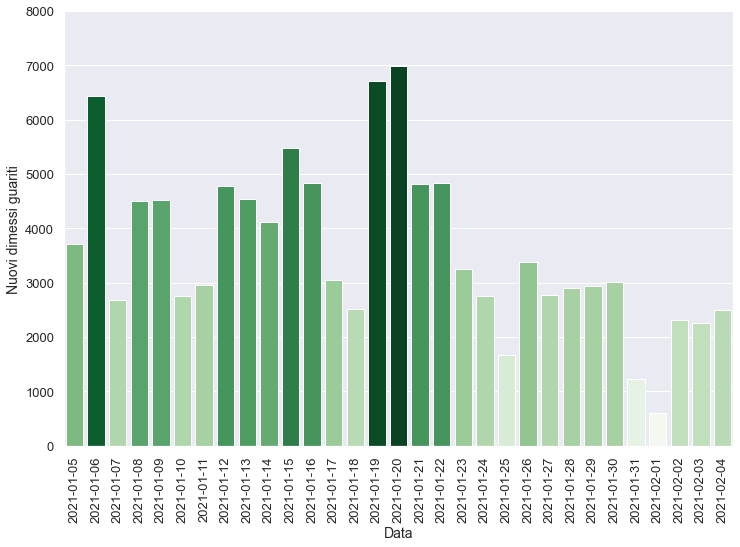

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-28T17:00:00,5,Veneto,1599,249,1848,37116,38964,-2381,572,...,52.0,32662.0,2745.0,-2271.0,13.47,4.74,1.75,20.84,-3.49,-5.76
1,2021-01-29T17:00:00,5,Veneto,1509,240,1749,35216,36965,-1999,985,...,53.0,40820.0,2604.0,-1900.0,13.72,4.73,2.41,37.83,-3.61,-5.13
2,2021-01-30T17:00:00,5,Veneto,1438,222,1660,33017,34677,-2288,792,...,60.0,57107.0,3053.0,-2199.0,13.37,4.79,1.39,25.94,-7.50,-6.19
3,2021-01-31T17:00:00,5,Veneto,1430,217,1647,32298,33945,-732,499,...,9.0,21044.0,2313.0,-719.0,13.18,4.85,2.37,21.57,-2.25,-2.11
4,2021-02-01T17:00:00,5,Veneto,1410,214,1624,32196,33820,-125,510,...,39.0,11562.0,1519.0,-102.0,13.18,4.80,4.41,33.57,-1.38,-0.37
5,2021-02-02T17:00:00,5,Veneto,1423,193,1616,30428,32044,-1776,621,...,76.0,39304.0,2374.0,-1768.0,11.94,5.04,1.58,26.16,-9.81,-5.25
6,2021-02-03T17:00:00,5,Veneto,1306,176,1482,28878,30360,-1684,629,...,57.0,39047.0,2890.0,-1550.0,11.88,4.88,1.61,21.76,-8.81,-5.26
7,2021-02-04T17:00:00,5,Veneto,1232,176,1408,27296,28704,-1656,896,...,62.0,36294.0,3134.0,-1582.0,12.50,4.91,2.47,28.59,0.00,-5.45


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

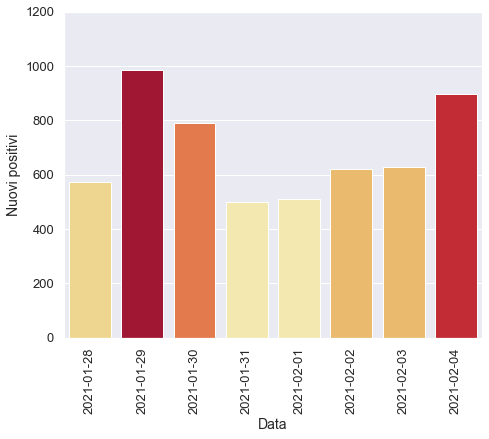

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

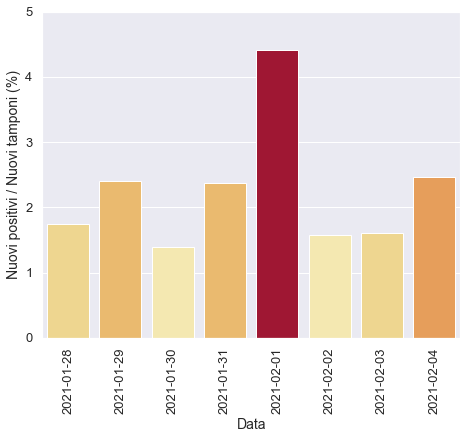

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

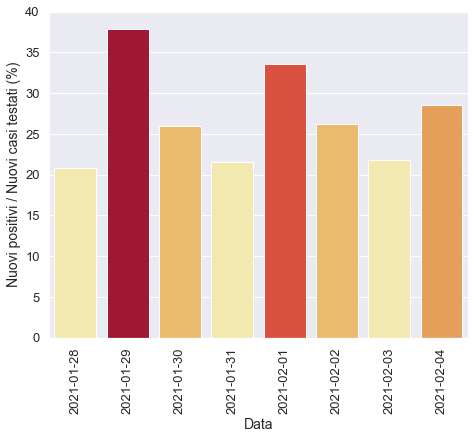

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

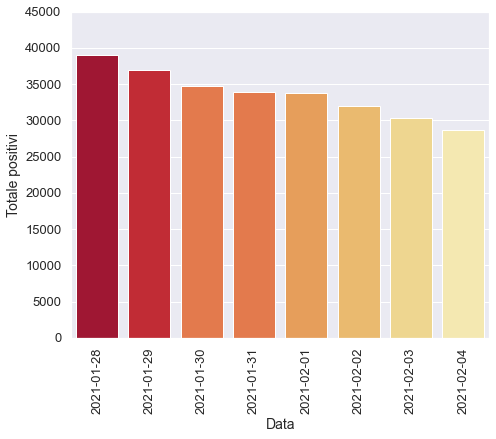

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

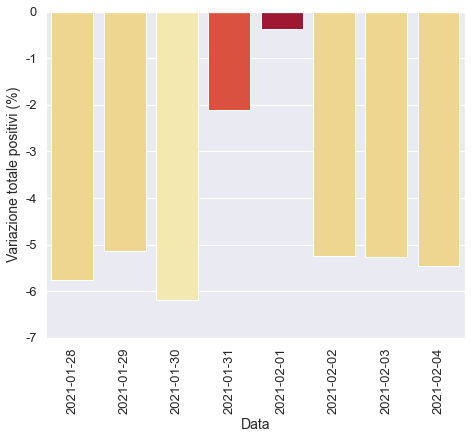

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

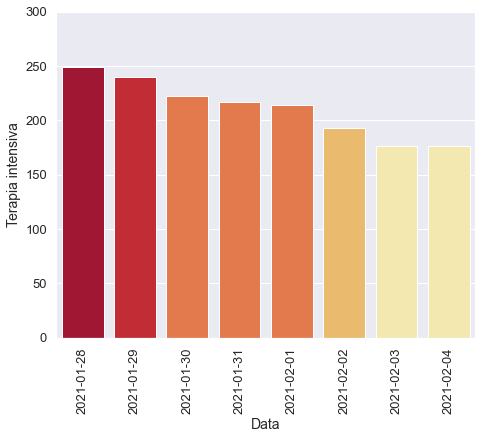

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

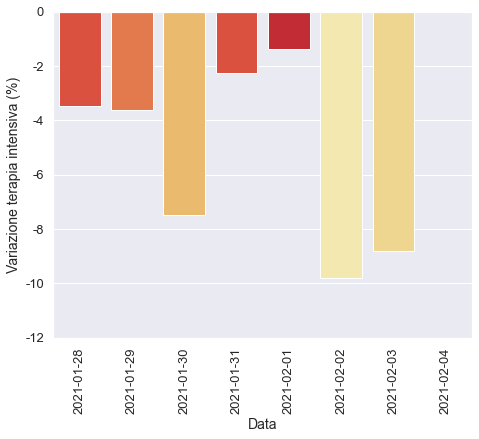

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

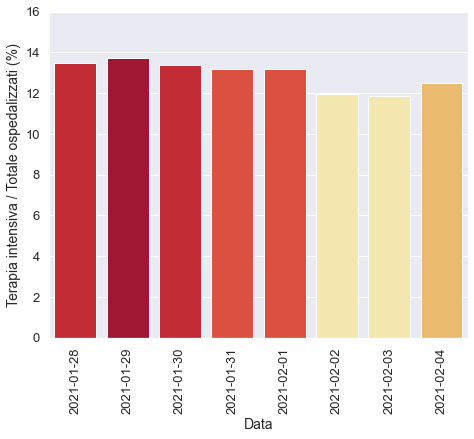

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

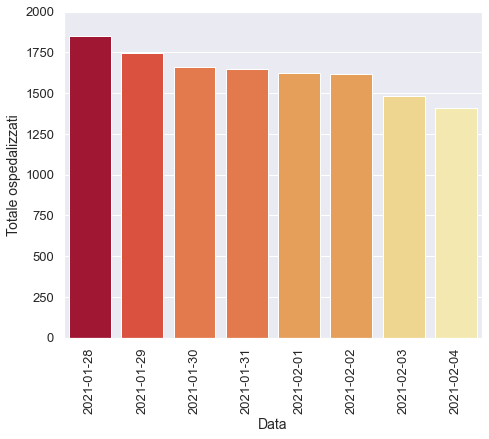

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

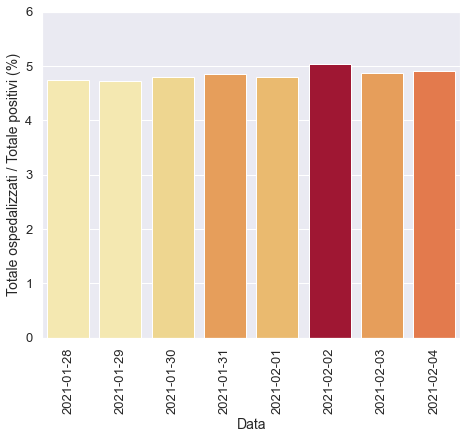

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

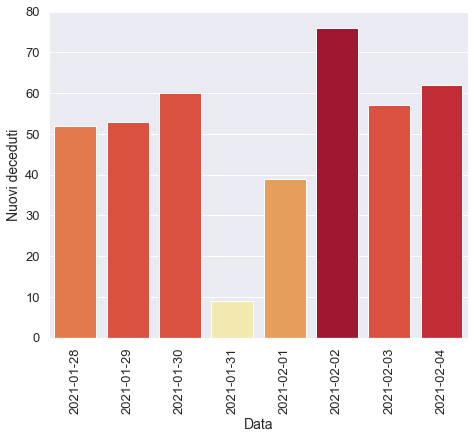

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

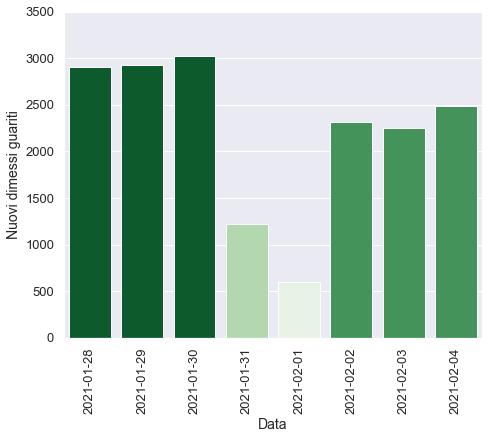

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)